In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import data repository
pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 
  
# metadata 
print(communities_and_crime.metadata) 
  
# variable information 
print(communities_and_crime.variables) 

{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'title': 'A data-driven software tool for enabling cooperative information sharing among police departmen

In [4]:
#Display all columns/rows to perform EDA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)


In [5]:
#remove any n/a rows
df_X = df_X.dropna(axis=0)
df_X.isna().any(axis=1).sum()
df_X.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  \
0           0.33          0.02          0.90          0.12         0.17   
1           0.16          0.12          0.74          0.45         0.07   
2           0.42          0.49          0.56          0.17         0.04   
3           0.77          1.00          0.08          0.12         0.10   
4           0.55          0.02          0.95          0.09         0.05   

   agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  \
0         0.34         0.47         0.29        0.32       0.20       1.0   
1         0.26         0.59         0.35        0.27       0.02       1.0   
2         0.39         0.47         0.28        0.32       0.00       0.0   
3         0.51         0.50         0.34        0.21       0.06       1.0   
4         0.38         0.38         0.23        0.36       0.02       0.9   

   medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  \
0       0.37      0.72          0.34        0.60        0.29         0.15   
1       0.31      0.72          0.11        0.45        0.25         0.29   
2       0.30      0.58          0.19        0.39        0.38         0.40   
3       0.58      0.89          0.21        0.43        0.36         0.20   
4       0.50      0.72          0.16        0.68        0.44         0.11   

   pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  \
0        0.43       0.39       0.40         0.39         0.32          0.27   
1        0.39       0.29       0.37         0.38         0.33          0.16   
2        0.84       0.28       0.27         0.29         0.27          0.07   
3        0.82       0.51       0.36         0.40         0.39          0.16   
4        0.71       0.46       0.43         0.41         0.28          0.00   

   AsianPerCap OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  \
0         0.27        0.36        0.41         0.08            0.19   
1         0.30        0.22        0.35         0.01            0.24   
2         0.29        0.28        0.39         0.01            0.27   
3         0.25        0.36        0.44         0.01            0.10   
4         0.74        0.51        0.48         0.00            0.06   

   PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  \
0             0.10          0.18         0.48           0.27       0.68   
1             0.14          0.24         0.30           0.27       0.73   
2             0.27          0.43         0.19           0.36       0.58   
3             0.09          0.25         0.31           0.33       0.71   
4             0.25          0.30         0.33           0.12       0.65   

   PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  \
0         0.23             0.41          0.25              0.52   
1         0.57             0.15          0.42              0.36   
2         0.32             0.29          0.49              0.32   
3         0.36             0.45          0.37              0.39   
4         0.67             0.38          0.42              0.46   

   MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  \
0            0.68            0.40          0.75         0.75        0.35   
1            1.00            0.63          0.91         1.00        0.29   
2            0.63            0.41          0.71         0.70        0.45   
3            0.34            0.45          0.49         0.44        0.75   
4            0.22            0.27          0.20         0.21        0.51   

   P

In [6]:
#reduce dataset to look analyze key features for this project
X_subset = df_X[['population','racepctblack','racePctWhite','racePctAsian','racePctHisp','medIncome','PctNotHSGrad','PctPopUnderPov','PctUnemployed','NumImmig','RentMedian','PopDens']]
X_subset.head()

population  racepctblack  racePctWhite  racePctAsian  racePctHisp  \
0        0.19          0.02          0.90          0.12         0.17   
1        0.00          0.12          0.74          0.45         0.07   
2        0.00          0.49          0.56          0.17         0.04   
3        0.04          1.00          0.08          0.12         0.10   
4        0.01          0.02          0.95          0.09         0.05   

   medIncome  PctNotHSGrad  PctPopUnderPov  PctUnemployed  NumImmig  \
0       0.37          0.18            0.19           0.27      0.03   
1       0.31          0.24            0.24           0.27      0.01   
2       0.30          0.43            0.27           0.36      0.00   
3       0.58          0.25            0.10           0.33      0.02   
4       0.50          0.30            0.06           0.12      0.00   

   RentMedian  PopDens  
0        0.35     0.26  
1        0.38     0.12  
2        0.29     0.21  
3        0.70     0.39  
4        0.36     0.09

In [10]:
#Merge independent/dependent variable into one dataset for EDA
X_subset1 = pd.merge(y, X_subset, left_index=True, right_index=True)

#attempt to use logarithmic function on dependent variable to fix homoscedasticity issue, did not fix the issue 

#X_subset_scaled = X_subset1 * 100
#X_filtered= X_subset_scaled[X_subset_scaled['ViolentCrimesPerPop']!=0]
#X_subset_scaled['ViolentCrimesPerPop_log']=np.log(X_subset_scaled['ViolentCrimesPerPop'])
#np.isnan(X_subset_scaled['ViolentCrimesPerPop_log']).any(axis=0).sum()

X_subset1.head()

ViolentCrimesPerPop  population  racepctblack  racePctWhite  racePctAsian  \
0                 0.20        0.19          0.02          0.90          0.12   
1                 0.67        0.00          0.12          0.74          0.45   
2                 0.43        0.00          0.49          0.56          0.17   
3                 0.12        0.04          1.00          0.08          0.12   
4                 0.03        0.01          0.02          0.95          0.09   

   racePctHisp  medIncome  PctNotHSGrad  PctPopUnderPov  PctUnemployed  \
0         0.17       0.37          0.18            0.19           0.27   
1         0.07       0.31          0.24            0.24           0.27   
2         0.04       0.30          0.43            0.27           0.36   
3         0.10       0.58          0.25            0.10           0.33   
4         0.05       0.50          0.30            0.06           0.12   

   NumImmig  RentMedian  PopDens  
0      0.03        0.35     0.26  
1      0.01        0.38     0.12  
2      0.00        0.29     0.21  
3      0.02        0.70     0.39  
4      0.00        0.36     0.09

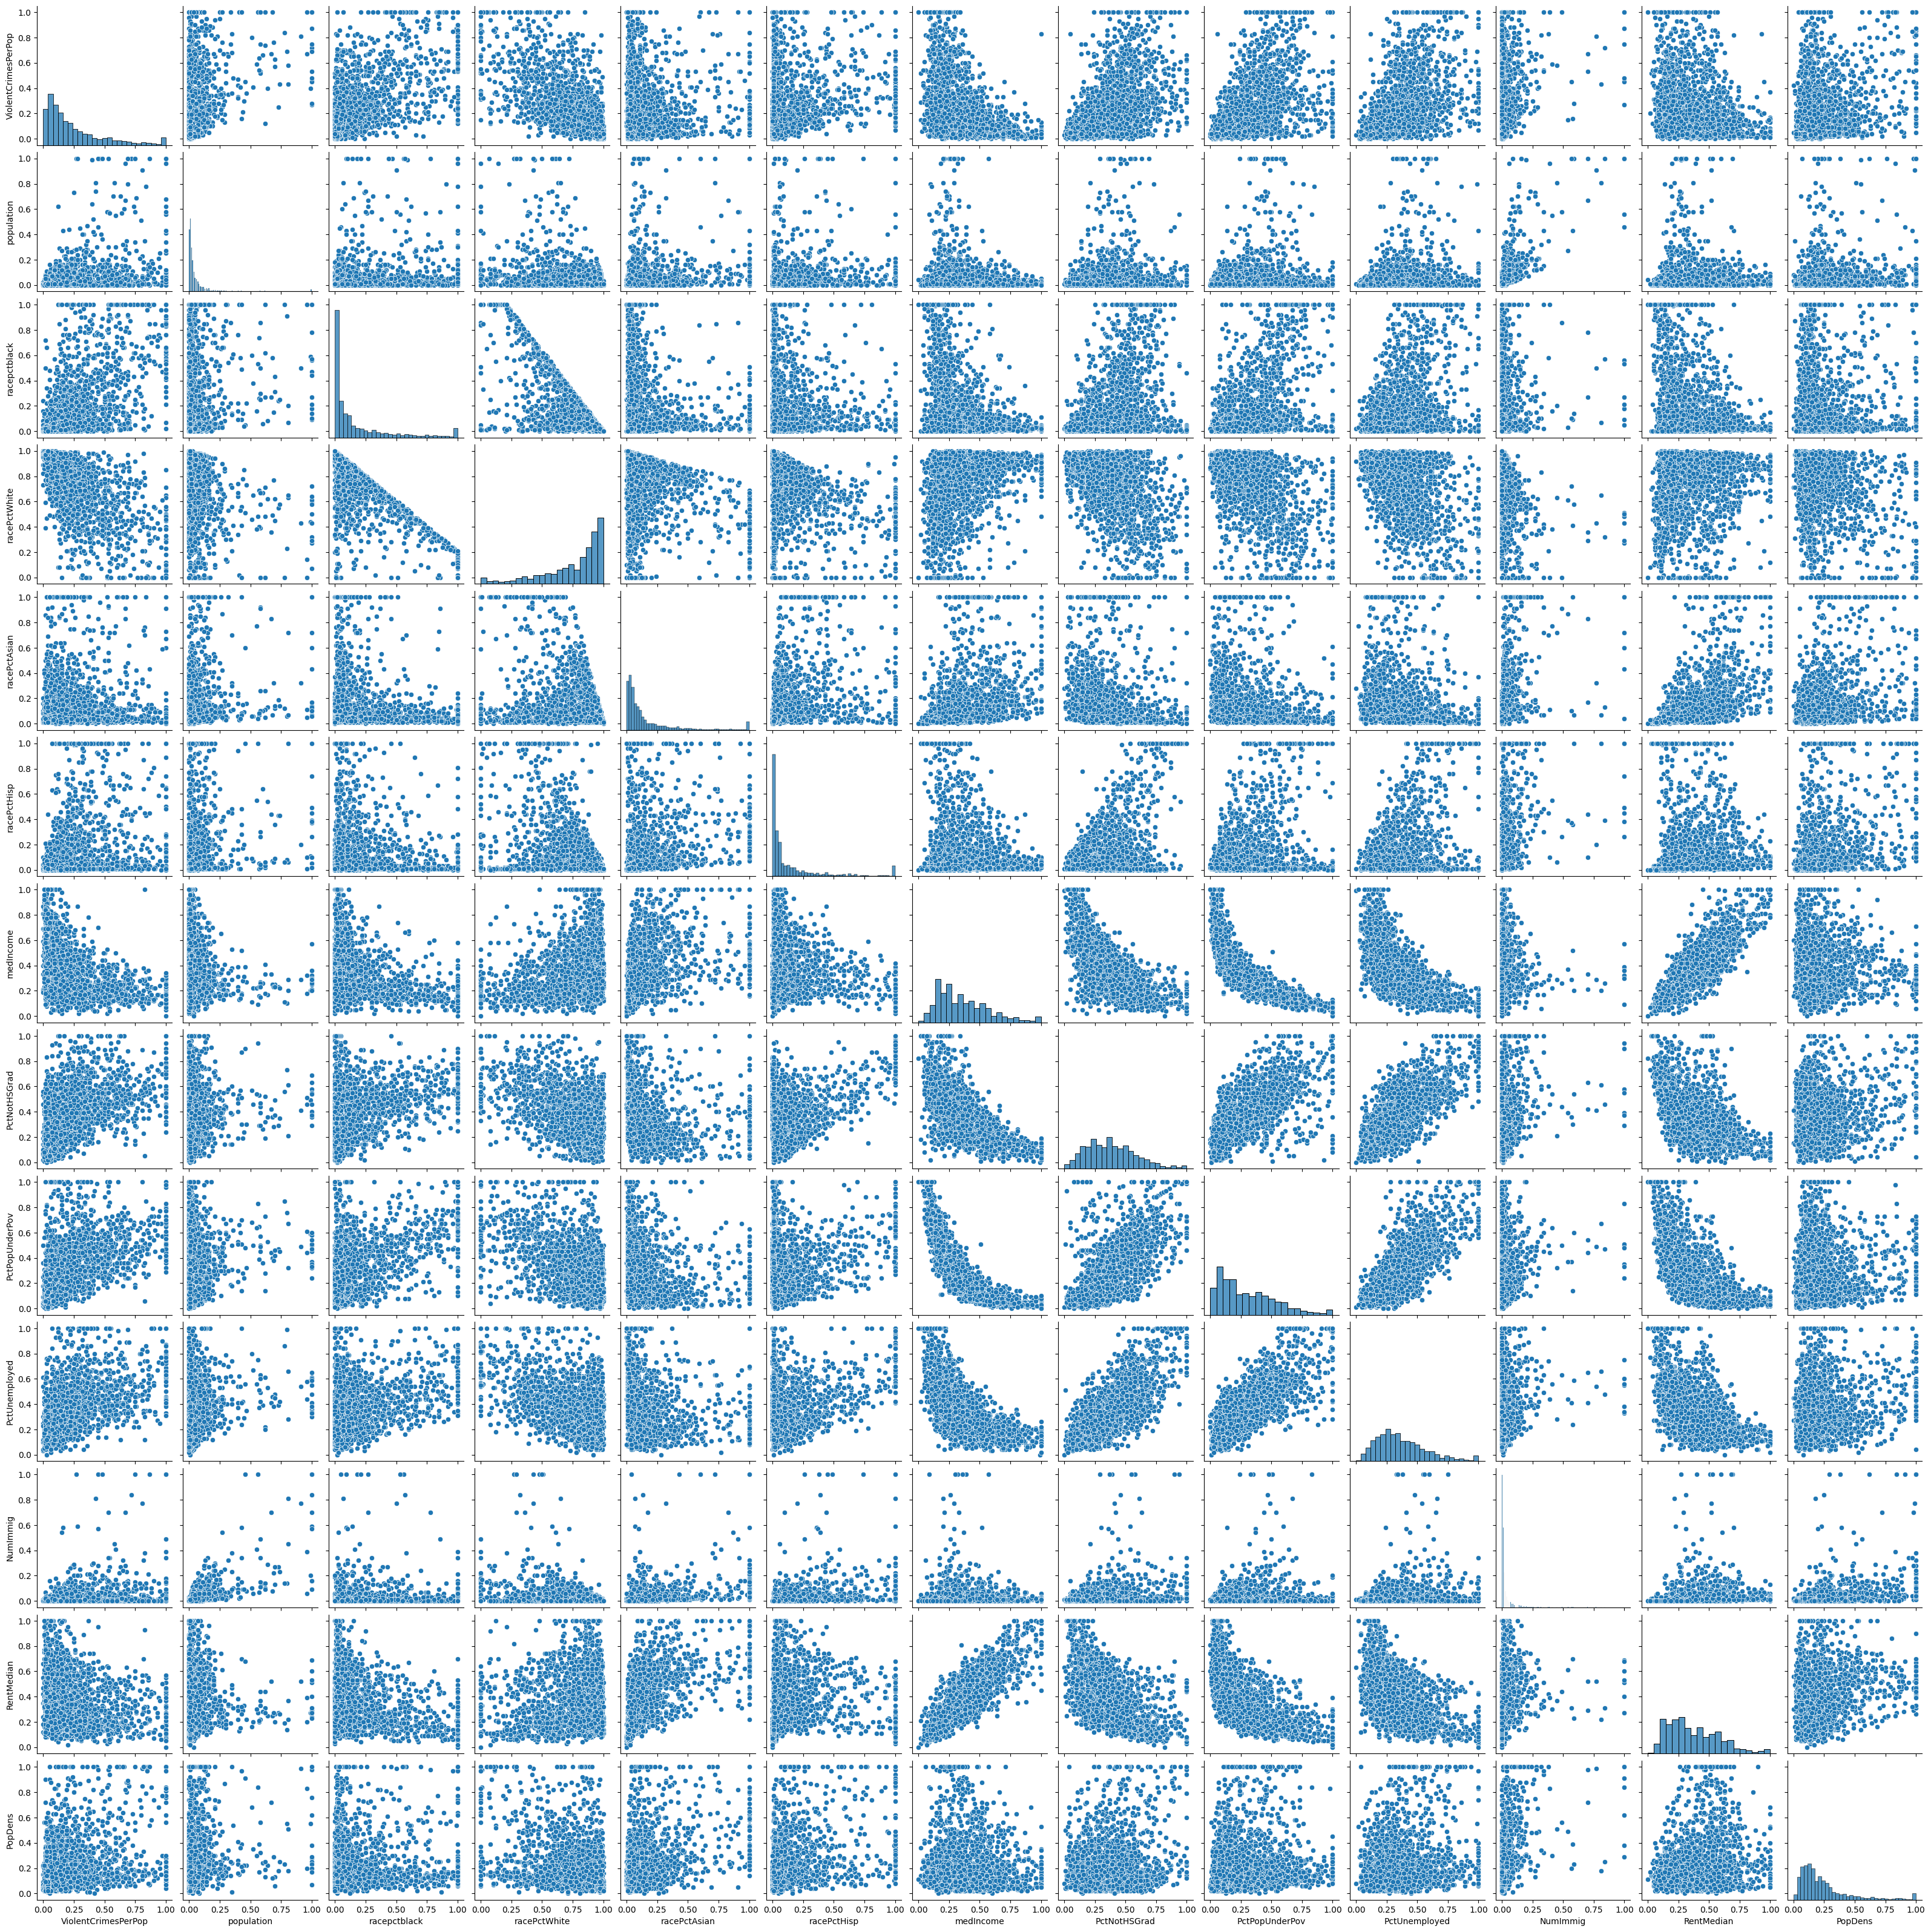

In [28]:
#view pariplot for linear relationships
sns.pairplot(X_subset1)

In [12]:
#Setting up ordinary least squares regression test
ols_formula = 'ViolentCrimesPerPop ~ population +	racepctblack +	racePctWhite +	racePctAsian +	racePctHisp +	medIncome +	PctNotHSGrad	+ PctPopUnderPov +	PctUnemployed +	NumImmig	+RentMedian+	PopDens'
OLS = ols(formula = ols_formula, data = X_subset1)
model = OLS.fit()

# Save the results summary.


model_results = model.summary()

# Display the model results.


model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.587
Model:                             OLS   Adj. R-squared:                  0.584
Method:                  Least Squares   F-statistic:                     234.2
Date:                 Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                         09:58:28   Log-Likelihood:                 956.59
No. Observations:                 1994   AIC:                            -1887.
Df Residuals:                     1981   BIC:                            -1814.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1337      0.062      2.157      0.031       0.012       0.255
population         0.3475      0.043      8.057      0.000       0.263       0.432
racepctblack       0.4100      0.047      8.786      0.000       0.318       0.502
racePctWhite      -0.0675      0.055     -1.221      0.222      -0.176       0.041
racePctAsian       0.0067      0.029      0.235      0.814      -0.049       0.063
racePctHisp        0.1384      0.031      4.416      0.000       0.077       0.200
medIncome         -0.3238      0.043     -7.596      0.000      -0.407      -0.240
PctNotHSGrad       0.0924      0.031      2.982      0.003       0.032       0.153
PctPopUnderPov    -0.0042      0.032     -0.131      0.896      -0.067       0.059
PctUnemployed      0.0711      0.031      2.297      0.022       0.010       0.132
NumImmig          -0.0753      0.068     -1.103      0.270      -0.209       0.059
RentMedian         0.2328      0.039      6.039      0.000       0.157       0.308
PopDens            0.0561      0.021      2.675      0.008       0.015       0.097
==============================================================================
Omnibus:                      391.032   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1100.485
Skew:                           1.018   Prob(JB):                    1.08e-239
Kurtosis:                       6.017   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

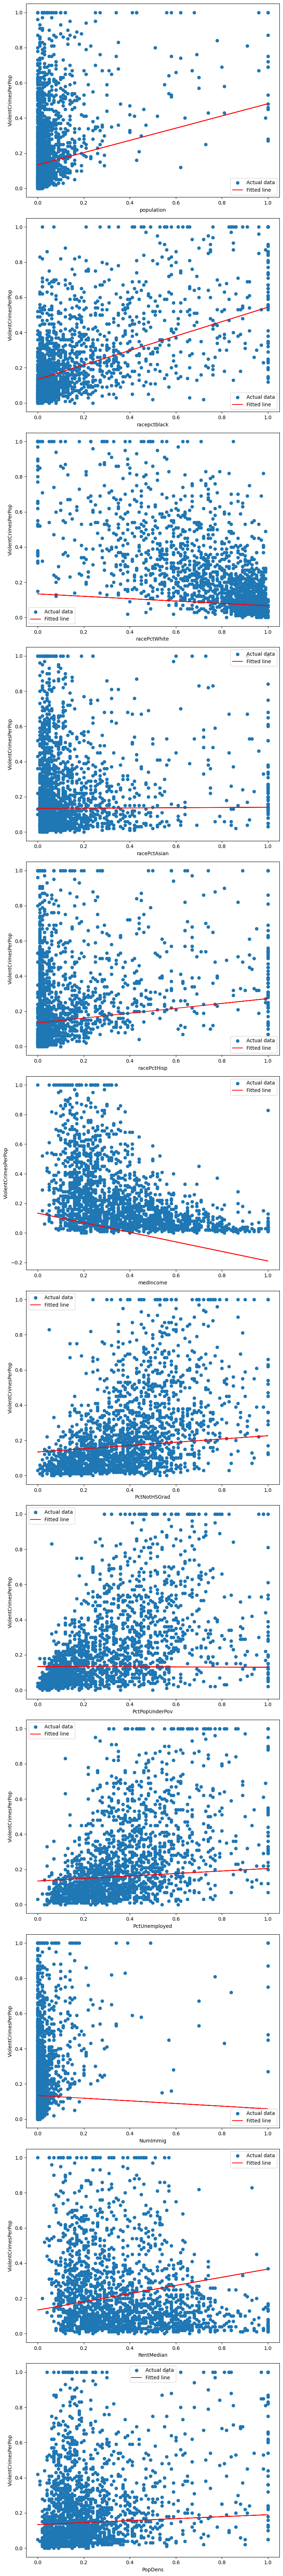

In [38]:
#view each regression graph between dependent and independent variables

intercept = model.params['Intercept']
coefficients = model.params.drop('Intercept')

fig, axs = plt.subplots(len(coefficients), 1, figsize=(8, 6 * len(coefficients)))
#fig.suptitle('Scatter Plots with Fitted Regression Lines')

for i, (var, coef) in enumerate(coefficients.items()):
    axs[i].scatter(X_subset1[var], X_subset1['ViolentCrimesPerPop'], label='Actual data')
    axs[i].plot(X_subset1[var], intercept + coef * X_subset1[var], color='red', label='Fitted line')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('ViolentCrimesPerPop')
    axs[i].legend()

plt.tight_layout()
plt.show()

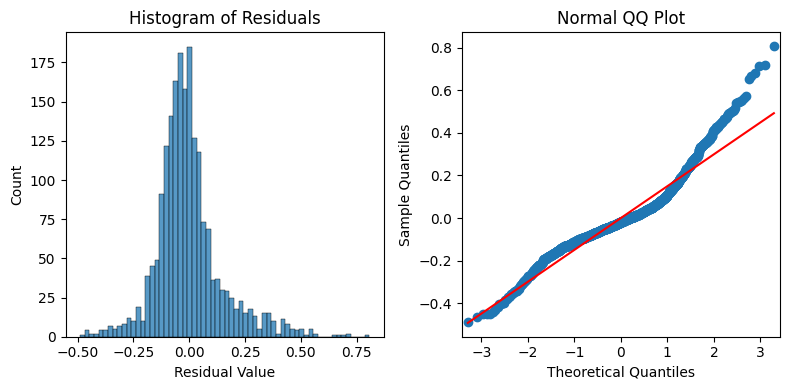

In [50]:
#NORMALITY assumption
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 


sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.


sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

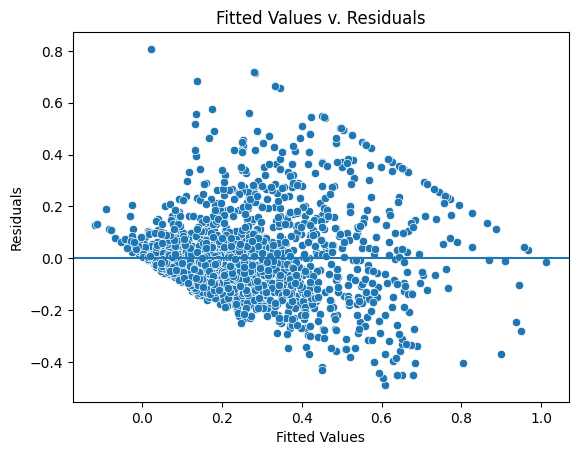

In [39]:
#Homoscedasticity Assumption
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.


fig.axhline(0)

# Show the plot.
plt.show()

In [ ]:
#Showing homoscedasticity, attempted to fix the dataset during EDA,since we are dealing with human behavior these issues are to be expected 

In [76]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.587
Model:                             OLS   Adj. R-squared:                  0.584
Method:                  Least Squares   F-statistic:                     234.2
Date:                 Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                         08:21:51   Log-Likelihood:                 956.59
No. Observations:                 1994   AIC:                            -1887.
Df Residuals:                     1981   BIC:                            -1814.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1337      0.062      2.157      0.031       0.012       0.255
population         0.3475      0.043      8.057      0.000       0.263       0.432
racepctblack       0.4100      0.047      8.786      0.000       0.318       0.502
racePctWhite      -0.0675      0.055     -1.221      0.222      -0.176       0.041
racePctAsian       0.0067      0.029      0.235      0.814      -0.049       0.063
racePctHisp        0.1384      0.031      4.416      0.000       0.077       0.200
medIncome         -0.3238      0.043     -7.596      0.000      -0.407      -0.240
PctNotHSGrad       0.0924      0.031      2.982      0.003       0.032       0.153
PctPopUnderPov    -0.0042      0.032     -0.131      0.896      -0.067       0.059
PctUnemployed      0.0711      0.031      2.297      0.022       0.010       0.132
NumImmig          -0.0753      0.068     -1.103      0.270      -0.209       0.059
RentMedian         0.2328      0.039      6.039      0.000       0.157       0.308
PopDens            0.0561      0.021      2.675      0.008       0.015       0.097
==============================================================================
Omnibus:                      391.032   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1100.485
Skew:                           1.018   Prob(JB):                    1.08e-239
Kurtosis:                       6.017   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Creating new subset based on statistically significant variables based on regression test above

X_subset4 = X[['population','racepctblack','racePctHisp','medIncome','PctNotHSGrad','PctUnemployed','PopDens']]
X_subset5 = pd.merge(y, X_subset4, left_index=True, right_index=True)

In [44]:
#setting up ordinary least squares regression test

ols_formula = 'ViolentCrimesPerPop ~ population +	racepctblack +	racePctHisp +	medIncome +	PctNotHSGrad	+	PctUnemployed +	PopDens'
OLS = ols(formula = ols_formula, data = X_subset5)
model1 = OLS.fit()

# Save the results summary.


model_results1 = model.summary()

# Display the model results.



model_results1

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.576
Model:                             OLS   Adj. R-squared:                  0.575
Method:                  Least Squares   F-statistic:                     386.2
Date:                 Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                         07:40:32   Log-Likelihood:                 932.49
No. Observations:                 1994   AIC:                            -1849.
Df Residuals:                     1986   BIC:                            -1804.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0760      0.019      4.076      0.000       0.039       0.113
population        0.3162      0.029     10.942      0.000       0.260       0.373
racepctblack      0.4677      0.016     28.985      0.000       0.436       0.499
racePctHisp       0.1955      0.020      9.890      0.000       0.157       0.234
medIncome        -0.1266      0.025     -5.098      0.000      -0.175      -0.078
PctNotHSGrad      0.0604      0.030      2.015      0.044       0.002       0.119
PctUnemployed     0.0776      0.028      2.773      0.006       0.023       0.132
PopDens           0.1114      0.019      6.018      0.000       0.075       0.148
==============================================================================
Omnibus:                      395.428   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1138.824
Skew:                           1.021   Prob(JB):                    5.10e-248
Kurtosis:                       6.088   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
Analysis:

 With an R -squared value of 58% , I would say this model does a good job in explaining some key factors 
in explaining violent crime. With human behavior being less predictable, lower r-squared values are expected as it explans
how much the model explains the dependent variable. Looking at the results,these look like the main factors that relate to crime that are considered statistically
significant at P<0.05. Looking at the coefficients a way to analyze it would be for a one percent increase in population we can 
expect a 31% increase in crime with a 95% confidendence in it being from 26% increase in crime to 37% increase in crime.
This relates to crime being higher in inner cities with more population. Another analysis would be for every one percent 
increase in the cities median income there is a -32% decrease in violent crimes per population with 95% confidence that it
it will be between -40% and -25%. 

 """